In [4]:
# loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [5]:
# loading the fashion mnist data set
df = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = df.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# separating the train images to train images
train_images, train_labels = x_train, y_train
test_images, test_labels = x_test, y_test

In [7]:
# shape of the data set
print(f'train images shape: {train_images.shape}')
print(f'train labels shape: {train_labels.shape}')
print(f'test images shape: {test_images.shape}')
print(f'test labels shape: {test_labels.shape}')

train images shape: (60000, 28, 28)
train labels shape: (60000,)
test images shape: (10000, 28, 28)
test labels shape: (10000,)


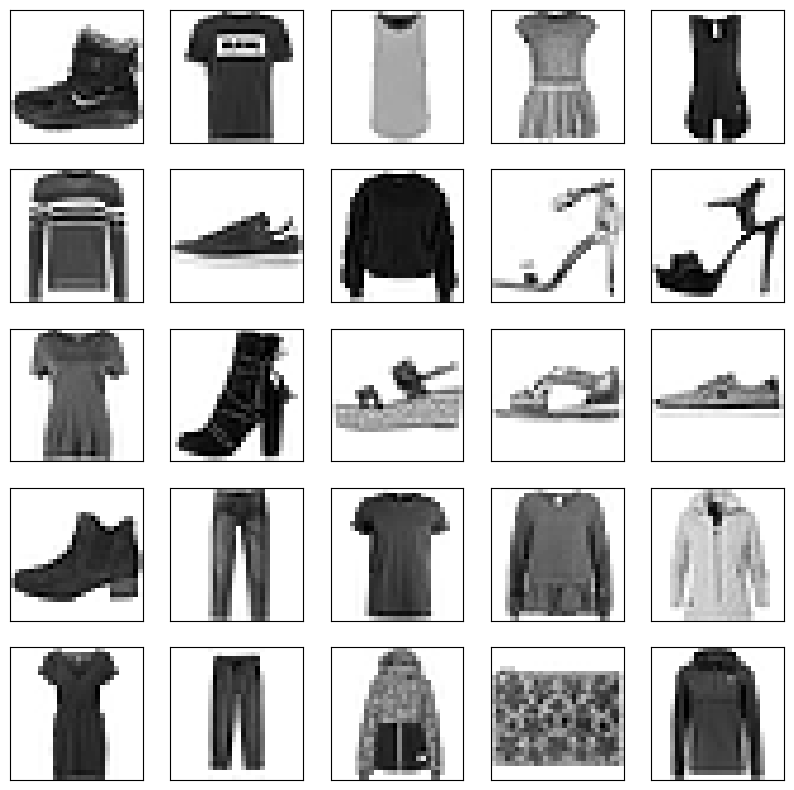

In [8]:
# displaing  some images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

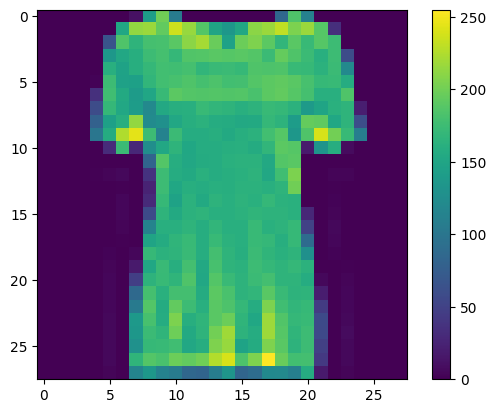

In [9]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
print('fixel values')
for row in train_images[0]:
  for pixel in row:
    print("{:3}".format(pixel), end="")
  print()

fixel values
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0 13 73  0  0  1  4  0  0  0  0  1  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  3  0 36136127 62 54  0  0  0  1  3  4  0  0  3
  0  0  0  0  0  0  0  0  0  0  0  0  6  0102204176134144123 23  0  0  0  0 12 10  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0155236207178107156161109 64 23 77130 72 15
  0  0  0  0  0  0  0  0  0  0  0  1  0 69207223218216216163127121122146141 88172 66
  0  0  0  0  0  0  0  0  0  1  1  1  0200232232233229223223215213164127123196229  0
  0  0  0  0  0  0  0  0  0  0  0  0  0183225216223228235227224222224221223245173  0
  0  0  0  0  0  0  0  0  0  0  0  0  0193228218213198180212210211213223220243202  0
  0  0  0  0  0  0  0  0  0  1  3  0 122192202122181

In [11]:
# scaling the pixels of images
train_images = train_images / 255
test_images = test_images / 255

In [12]:
# converting  into float
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [13]:
print('fixel values')
for row in train_images[0]:
  for pixel in row:
    print("{:3}".format(pixel), end="")
  print()

fixel values
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.0039215688593685630.00.00.050980392843484880.28627452254295350.00.00.0039215688593685630.015686275437474250.00.00.00.00.0039215688593685630.0039215688593685630.0
0.00.00.00.00.00.00.00.00.00.00.00.00.01176470611244440.00.14117647707462310.53333336114883420.498039215803146360.243137255311012270.211764708161354060.00.00.00.0039215688593685630.01176470611244440.015686275437474250.00.00.0117647061124444
0.00.00.00.00.00.00.00.00.00.00.00.00.02352941222488880.00.40000000596046450.8000000119209290.69019609689712520.52549022436141970.56470590829849240.482352942228317260.090196080505847930.00.00.00.00.04705882444977760.039215687662363050.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.6078431606

In [14]:
# Display the values of each pixel in the image after normalization
print("\nPixel values after normalization:")
for row in train_images[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()


Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.004 0.000 0.000 0.051 0.286 0.000 0.000 0.004 0.016 0.000 0.000 0.000 0.000 0.004 0.004 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.000 0.141 0.533 0.498 0.243 0.212 0.000 0.000 0.000 0.004 0.012 0.016 0.000 0.000 0.012 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.024 0.000 0.400 0.800 0.690 0.525 0.565 0.482 

In [15]:
# reshaping the data
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

# BUILDING THE MODEL

In [16]:
# CNN model building
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,194 (129.66 KB)

 Trainable params: 33,194 (129.66 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [18]:
#EarlyStoping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# fiting the model
history = model.fit(train_images, train_labels, epochs = 30, batch_size=30, validation_data=(test_images,test_labels))

Epoch 1/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 123s 61ms/step - accuracy: 0.7484 - loss: 0.6940 - val_accuracy: 0.8638 - val_loss: 0.3873
Epoch 2/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 120s 60ms/step - accuracy: 0.8818 - loss: 0.3269 - val_accuracy: 0.8798 - val_loss: 0.3205
Epoch 3/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 124s 62ms/step - accuracy: 0.8991 - loss: 0.2789 - val_accuracy: 0.8950 - val_loss: 0.2872
Epoch 4/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 122s 61ms/step - accuracy: 0.9102 - loss: 0.2451 - val_accuracy: 0.9054 - val_loss: 0.2669
Epoch 5/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 121s 61ms/step - accuracy: 0.9180 - loss: 0.2253 - val_accuracy: 0.9036 - val_loss: 0.2650
Epoch 6/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 142s 61ms/step - accuracy: 0.9245 - loss: 0.2073 - val_accuracy: 0.9004 - val_loss: 0.2822
Epoch 7/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 124s 62ms/step - accuracy: 0.9283 - loss: 0.1942 - val_accuracy: 0.9046 - val_loss: 0.2594
Epoch 8/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 121s 60ms/step - accuracy: 

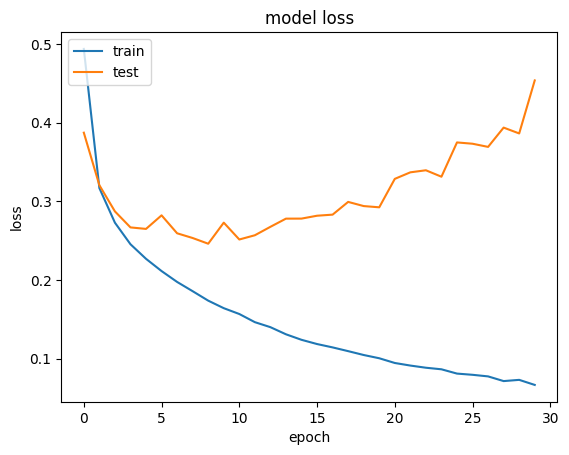

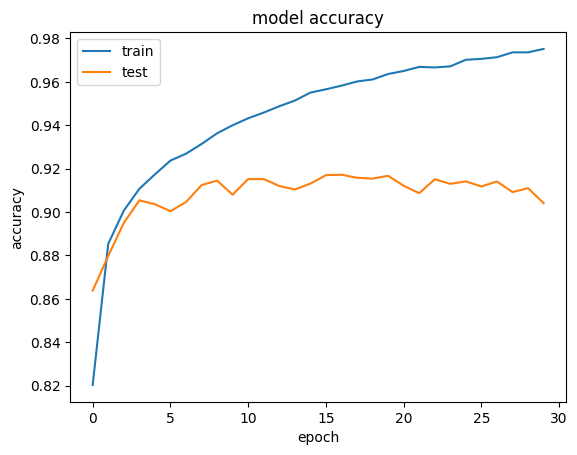

In [19]:
# ploting the traning and testing  loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# ploting the accuracy of traning and val_accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# printing the accracy and loss
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(('test accuracy',test_loss))
print(('test loss',test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9048 - loss: 0.4668
('test accuracy', 0.4537629783153534)
('test loss', 0.9041000008583069)


# Predicting an image


(28, 28, 1)


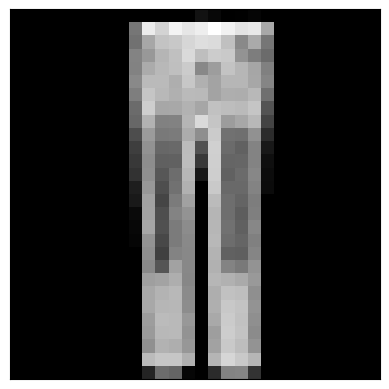

In [27]:
image = test_images[15]
print(image.shape)
plt.imshow(image.reshape(28,28), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

(28, 28, 1)
(28, 28, 1)


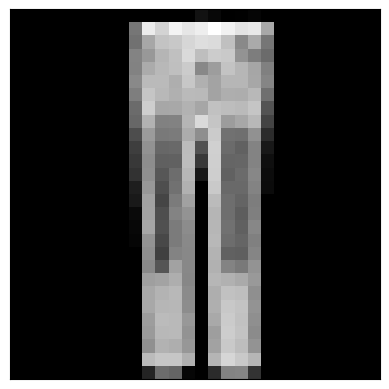

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
The model predicts that this image is a 1.


In [28]:
# grab an image
img = test_images[15]
print(img.shape)
# # rehape the image to (28, 28, 1)
img = img.reshape((28, 28, 1))
print(img.shape)
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()
# predict the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(f"The model predicts that this image is a {predictions.argmax()}.")